In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import seaborn as sns
import re

BASE_DIR = "./"

In [32]:
def average_by_epoch(df_list, x, y):
    epochs = [tuple(df['epoch'].tolist()) for df in df_list]
    assert len(set(epochs)) == 1
    xs = [df[x].tolist() for df in df_list]
    ys = [df[y].tolist() for df in df_list]

    xs = pd.DataFrame(xs).T.mean(axis=1).tolist()
    ys = pd.DataFrame(ys).T.mean(axis=1).tolist()

    df = pd.DataFrame(zip(xs, ys), columns=[x, y])

    return df

In [2]:
# Canary insertion

In [44]:
# missed experiments
#nodp normalized
df_nodps_normalized = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*")):
    df_nodps_normalized.append(pd.read_csv(p))

#partial dp missed
df_partialdps_missed = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed", "*")):
    df_partialdps_missed.append(pd.read_csv(p))



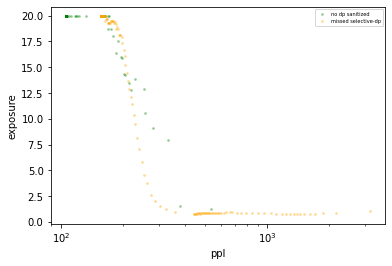

In [45]:

dot_size=3
alpha = 0.3
x_var = 'model_ppl'
y_var = 'canary_exposure'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter


# average
df_nodps_normalized = [average_by_epoch(df_nodps_normalized, 'model_ppl', 'canary_exposure')]
df_partialdps_missed = [average_by_epoch(df_partialdps_missed, 'model_ppl', 'canary_exposure')]


for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='no dp sanitized')



for i, df_partialdp in enumerate(df_partialdps_missed):
    
    # matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    # lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        label="missed selective-dp"
        # label = f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}"
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color="orange", s=dot_size, alpha=alpha, label=label)
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))





# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('exposure')
plt.show()

In [3]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp", "*")):
    df_nodps.append(pd.read_csv(p))

#nodp normalized
df_nodps_normalized = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "nodp_normalized", "*")):
    df_nodps_normalized.append(pd.read_csv(p))



#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp", "*")):
    df_partialdps.append(pd.read_csv(p))

#partial dp
df_partialdps_missed = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "partialdp_missed", "*")):
    df_partialdps_missed.append(pd.read_csv(p))

#dp
df_dps = []
for p in glob(os.path.join(BASE_DIR, "canary_insertion", "dp", "*")):
    df_dps.append(pd.read_csv(p))

# df_partial025 = pd.read_csv('./canary_insertion/partial_dp_sigma025_lr01_norm01_with_privacy.csv')

IsADirectoryError: [Errno 21] Is a directory: './canary_insertion/partialdp/resume'

/home/wyshi/anaconda3/envs/privacy/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


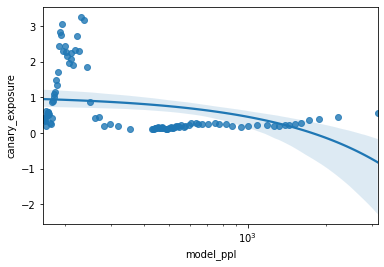

In [14]:
# sns.regplot(df_nodps[0]['model_ppl'].iloc[1:],df_nodps[0]['canary_exposure'].iloc[1:])

sns.regplot(df_partialdps[0]['model_ppl'].iloc[1:],df_partialdps[0]['canary_exposure'].iloc[1:])
plt.xscale('log')

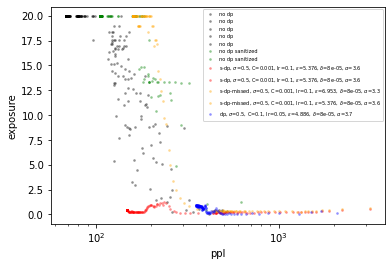

In [23]:

dot_size=3
alpha = 0.3
x_var = 'model_ppl'
y_var = 'canary_exposure'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter

for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp[x_var].tolist()[1:], df_nodp[y_var].tolist()[1:], color="black", s=dot_size, alpha=alpha, label='no dp')

for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='no dp sanitized')


for i, df_partialdp in enumerate(df_partialdps):
    
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if float(sigma) == 0.5 and float(C) == 0.001:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color="red", s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}")
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))

for i, df_partialdp in enumerate(df_partialdps_missed):
    
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color="orange", s=dot_size, alpha=alpha, label=f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}")
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))



for i, df_dp in enumerate(df_dps):
    
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_dp.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_dp[x_var].tolist()[1:], df_dp[y_var].tolist()[1:], color="blue", s=dot_size, alpha=alpha, label=f"dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_dp.iloc[-1]['model_epsilon']}, $\delta$={df_dp.iloc[-1]['model_delta']}, $\\alpha$={df_dp.iloc[-1]['model_alpha']}")


# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('exposure')
plt.show()

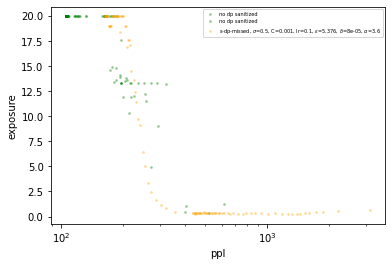

In [35]:

# missed
dot_size=3
alpha = 0.3
x_var = 'model_ppl'
y_var = 'canary_exposure'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*3

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter


for i, df_nodp_normalized in enumerate(df_nodps_normalized):
    plot_func(df_nodp_normalized[x_var].tolist()[1:], df_nodp_normalized[y_var].tolist()[1:], color="green", s=dot_size, alpha=alpha, label='no dp sanitized')




for i, df_partialdp in enumerate(df_partialdps_missed):
    df_partialdp = df_partialdp.iloc[:100]
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    if True:
        scatters = plot_func(df_partialdp[x_var].tolist()[1:], df_partialdp[y_var].tolist()[1:], color="orange", s=dot_size, alpha=alpha, label=f"s-dp-missed, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}")
        # scatters.set_color(cm(i//1*1.0/NUM_COLORS))





# plot_func(df_partial025[x_var].tolist()[1:], df_partial025[y_var].tolist()[1:], color='pink', s=dot_size, alpha=alpha)

# plot_func(151, 0.5, color='red')
# plot_func(120, 0.5, color='red')

plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('exposure')
plt.show()

In [34]:
df_partialdps_missed[0].iloc[:100]

,epoch,model_ppl,model_acc,model_epsilon,model_delta,model_alpha,canary_exposure,canary_rank,canary_ppl,TOTAL_CANDIDATES,model_path
0,0,50434.728114,0.00000,0.152,0.00008,63.0,1.918442,264540,51230.433115,1000000,model/partialdp/20210426/223009/data-wikitext-...
1,1,3158.458403,0.06286,2.548,0.00008,4.8,0.653060,635930,36220.535943,1000000,model/partialdp/20210426/223009/data-wikitext-...
2,1,2208.609617,0.06286,2.610,0.00008,4.8,0.535066,690127,20618.560152,1000000,model/partialdp/20210426/223009/data-wikitext-...
3,1,1872.498550,0.06286,2.643,0.00008,4.7,0.462386,725785,16454.042960,1000000,model/partialdp/20210426/223009/data-wikitext-...
4,1,1723.009859,0.06286,2.672,0.00008,4.7,0.420526,747152,17394.079700,1000000,model/partialdp/20210426/223009/data-wikitext-...
...,...,...,...,...,...,...,...,...,...,...,...
95,46,165.890938,0.33714,5.236,0.00008,3.6,19.931569,1,5558.566180,1000000,model/partialdp/20210426/223009/data-wikitext-...
96,47,164.828096,0.32571,5.271,0.00008,3.6,19.931569,1,4983.109254,1000000,model/partialdp/20210426/223009/data-wikitext-...
97,48,164.357489,0.33143,5.306,0.00008,3.6,19.931569,1,5134.715368,1000000,model/partialdp/20210426/223009/data-wikitext-...
98,49,163.618802,0.32000,5.341,0.00008,3.6,19.931569,1,4771.615230,1000000,model/partialdp/20210426/223009/data-wikitext-...


In [8]:
df_dp

,epoch,model_ppl,model_acc,model_epsilon,model_delta,model_alpha,canary_exposure,canary_rank,canary_ppl,TOTAL_CANDIDATES,model_path
0,0,50434.728205,0.00000,0.152,0.00008,63.0,1.918431,264542,51230.433115,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
1,1,2078.823487,0.06286,2.851,0.00008,4.5,0.145390,904135,23425.627706,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
2,2,1694.198634,0.06286,2.954,0.00008,4.4,0.341808,789052,19800.613896,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
3,3,1490.604277,0.06286,3.027,0.00008,4.3,0.245720,843395,19195.173028,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
4,4,1290.976999,0.09714,3.083,0.00008,4.3,0.082110,944675,21701.396657,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
...,...,...,...,...,...,...,...,...,...,...,...
96,96,353.136640,0.25714,4.830,0.00008,3.7,0.950626,517408,16991.581091,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
97,97,352.429117,0.25143,4.844,0.00008,3.7,0.858368,551576,18288.557786,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
98,98,351.818492,0.25143,4.858,0.00008,3.7,0.936550,522481,17800.344305,1000000,model/dp/20210425/151315/data-wikitext-2-add10...
99,99,351.533237,0.25714,4.872,0.00008,3.7,0.855197,552790,18397.780480,1000000,model/dp/20210425/151315/data-wikitext-2-add10...


In [40]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "*")):
    df_nodps.append(pd.read_csv(p))


#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "*")):
    df_partialdps.append(pd.read_csv(p))

In [3]:
#nodp
df_nodps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "nodp", "*_new_new.csv")):
    df_nodps.append(pd.read_csv(p))


#partial dp
df_partialdps = []
for p in glob(os.path.join(BASE_DIR, "membership_inference", "partialdp", "*_new_new.csv")):
    df_partialdps.append(pd.read_csv(p))

In [5]:
df_partialdps

[    epoch     model_ppl  model_acc  model_epsilon  model_delta  model_alpha  \
 0       0  50434.728205    0.00000          0.152      0.00008         63.0   
 1       1   3155.974359    0.06286          2.548      0.00008          4.8   
 2       1   2208.430902    0.06286          2.610      0.00008          4.8   
 3       1   1871.774875    0.06286          2.643      0.00008          4.7   
 4       1   1722.727188    0.06286          2.672      0.00008          4.7   
 ..    ...           ...        ...            ...          ...          ...   
 95     46    166.532041    0.34286          5.236      0.00008          3.6   
 96     47    165.240197    0.31429          5.271      0.00008          3.6   
 97     48    164.616628    0.33143          5.306      0.00008          3.6   
 98     49    164.189510    0.32571          5.341      0.00008          3.6   
 99     50    161.126068    0.33143          5.376      0.00008          3.6   
 
     inference_ppl_acc  inference_lowe

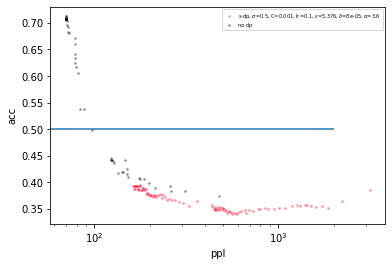

In [7]:

dot_size=3
alpha = 0.3
metrics = 'inference_lower_ppl_acc'#'inference_zlip_acc'#'inference_gpt2_acc'#'inference_ppl_acc'#'inference_lower_ppl_acc'#'inference_ppl_acc'

NUM_COLORS = 20
cm = plt.get_cmap('gist_rainbow')
colors = ['red', 'green', 'orange', 'yellow', 'blue']*4

fig = plt.figure()
ax = fig.add_subplot(111)

plot_func = ax.scatter



for i, df_partialdp in enumerate(df_partialdps):
    matched = re.search('_lr-(.+?)_.+_sigma-(.+?)_norm-(.+?)_', df_partialdp.iloc[-1]['model_path'])
    lr, sigma, C = matched.group(1), matched.group(2), matched.group(3)
    scatters = plot_func(df_partialdp['model_ppl'].tolist()[1:], df_partialdp[metrics].tolist()[1:], color=colors[i], s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$={sigma}, C={C}, lr={lr}, $\epsilon$={df_partialdp.iloc[-1]['model_epsilon']}, $\delta$={df_partialdp.iloc[-1]['model_delta']}, $\\alpha$={df_partialdp.iloc[-1]['model_alpha']}")
    scatters.set_color(cm(i//3*3.0/NUM_COLORS))


for i, df_nodp in enumerate(df_nodps):
    plot_func(df_nodp['model_ppl'].tolist()[1:], df_nodp[metrics].tolist()[1:], color="black", s=dot_size, alpha=alpha, label='no dp')

plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':5})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()

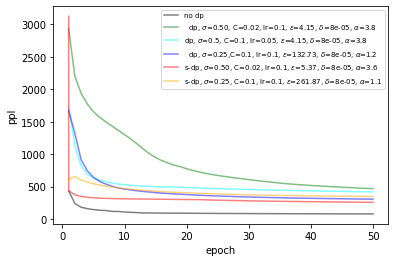

In [147]:
plot_func = plt.plot
dot_size=3
alpha = 0.5


plot_func(df_nodp_original['epoch'].tolist()[1:], df_nodp_original['model_ppl'].tolist()[1:], color='black',  alpha=alpha, label='no dp')


plot_func(df_dp['epoch'].tolist()[1:], df_dp['model_ppl'].tolist()[1:], color='green',  alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['epoch'].tolist()[1:], df_dp_norm01_lr005['model_ppl'].tolist()[1:], color='cyan', alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr01_sigma025['epoch'].tolist()[1:], df_dp_norm01_lr01_sigma025['model_ppl'].tolist()[1:], color='blue',  alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['epoch'].tolist()[1:], df_partial['model_ppl'].tolist()[1:], color='red',  alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['epoch'].tolist()[1:], df_partial_025['model_ppl'].tolist()[1:], color='orange',  alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['epoch'].tolist()[1:], df_partial_025['model_ppl'].tolist()[1:], color='green')
plt.legend(loc="upper right", prop={'size':7})
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('epoch')
plt.ylabel('ppl')
plt.show()

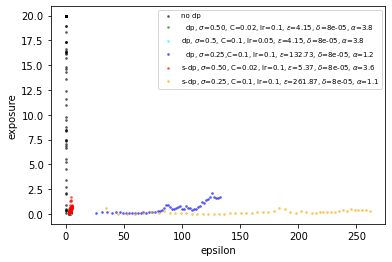

In [150]:
plot_func = plt.scatter
dot_size=3
alpha = 0.5


plot_func(df_nodp['epsilon'].tolist()[1:], df_nodp['canary_exposure'].tolist()[1:], color='black', s=dot_size, alpha=alpha, label='no dp')


plot_func(df_dp['epsilon'].tolist()[1:], df_dp['canary_exposure'].tolist()[1:], color='green', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['epsilon'].tolist()[1:], df_dp_norm01_lr005['canary_exposure'].tolist()[1:], color='cyan', s=dot_size, alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr01_sigma025['epsilon'].tolist()[1:], df_dp_norm01_lr01_sigma025['canary_exposure'].tolist()[1:], color='blue', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['epsilon'].tolist()[1:], df_partial['canary_exposure'].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['epsilon'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='orange', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['epsilon'].tolist()[1:], df_partial_025['canary_exposure'].tolist()[1:], color='green')
plt.legend(loc="upper right", prop={'size':7})
plt.xlabel('epsilon')
plt.ylabel('exposure')
plt.show()

In [188]:
# membership
#nodp
df_nodp_original_mem = pd.read_csv('../membership_inference/nodp_1000_with_privacy.csv')
# df_nodp_epoch1_bs32 = pd.read_csv('./nodp_10insertion_epoch1_bs32_with_privacy.csv').iloc[1:]
# df_nodp_epoch1_bs16 = pd.read_csv('./nodp_10insertion_epoch1_bs16_with_privacy.csv').iloc[1:]
# df_nodp = df_nodp_original.append(df_nodp_epoch1_bs32).append(df_nodp_epoch1_bs16).sort_values(by=['epoch', 'model_ppl'], ascending=[True, False]).drop_duplicates()


#dp
df_dp = pd.read_csv('../membership_inference/dp_lr05_sigma05_norm002_1000_with_privacy.csv')
# dp norm=0.1, lr=0.05
df_dp_norm01_lr005 = pd.read_csv('../membership_inference/dp_lr005_sigma05_norm01_1000_with_privacy.csv')
# df_dp_norm01_lr01_sigma025 = pd.read_csv('./dp_sigma025_lr01_norm01_with_privacy.csv')

#partial dp
df_partial = pd.read_csv('../membership_inference/partial_dp_lr01_sigma05_norm002_1000_epoch50_with_privacy.csv')
df_partial_epoch1 = pd.read_csv('../membership_inference/partial_dp_lr01_sigma05_norm002_1000_epoch1_save_every_batch_with_privacy.csv').iloc[1:]
df_partial = df_partial.append(df_partial_epoch1).sort_values(by=['epoch', 'model_ppl'], ascending=[True, False]).drop_duplicates()
df_partial_025 = pd.read_csv('../membership_inference/partialdp_lr01_sigma025_norm01_1000_with_privacy.csv')


In [190]:
df_nodp_original_mem.head()

,epoch,model_ppl,model_acc,inference_ppl_acc,inference_lower_ppl_acc,inference_gpt2_acc,inference_zlip_acc,TOTAL_CANDIDATES,model_path_x,epsilon,delta,alpha,model_path_y
0,0,50435.213332,0.00000,0.576,0.516,0.564,0.552,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
1,1,432.096859,0.22400,0.330,0.512,0.550,0.324,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
2,2,238.029466,0.26872,0.344,0.532,0.552,0.334,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
3,3,180.329926,0.29176,0.340,0.538,0.552,0.340,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...
4,4,158.918479,0.29836,0.352,0.540,0.554,0.346,1000,model/nodp/20210409/185850/data-wikitext-2-add...,0,0,0,model/nodp/20210409/185850/data-wikitext-2-add...


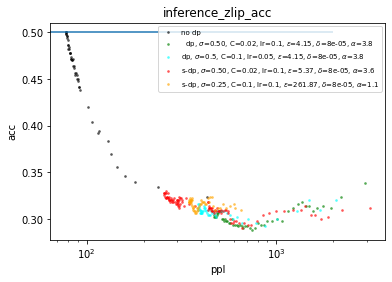

In [194]:
plot_func = plt.scatter
dot_size=3
alpha = 0.5
metrics = "inference_zlip_acc"#"inference_ppl_acc"


plt.title(metrics)
plot_func(df_nodp_original_mem['model_ppl'].tolist()[1:], df_nodp_original_mem[metrics].tolist()[1:], color='black', s=dot_size, alpha=alpha, label='no dp')


plot_func(df_dp['model_ppl'].tolist()[1:], df_dp[metrics].tolist()[1:], color='green', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_dp.iloc[-1]['epsilon']}, $\delta$={df_dp.iloc[-1]['delta']}, $\\alpha$={df_dp.iloc[-1]['alpha']}")
plot_func(df_dp_norm01_lr005['model_ppl'].tolist()[1:], df_dp_norm01_lr005[metrics].tolist()[1:], color='cyan', s=dot_size, alpha=alpha, label=f"dp, $\sigma$=0.5, C=0.1, lr=0.05, $\epsilon$={df_dp_norm01_lr005.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr005.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr005.iloc[-1]['alpha']}")
# plot_func(df_dp_norm01_lr01_sigma025['model_ppl'].tolist()[1:], df_dp_norm01_lr01_sigma025['inference_ppl_acc'].tolist()[1:], color='blue', s=dot_size, alpha=alpha, label=f"  dp, $\sigma$=0.25,C=0.1, lr=0.1, $\epsilon$={df_dp_norm01_lr01_sigma025.iloc[-1]['epsilon']}, $\delta$={df_dp_norm01_lr01_sigma025.iloc[-1]['delta']}, $\\alpha$={df_dp_norm01_lr01_sigma025.iloc[-1]['alpha']}")


plot_func(df_partial['model_ppl'].tolist()[1:], df_partial[metrics].tolist()[1:], color='red', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.50, C=0.02, lr=0.1, $\epsilon$={df_partial.iloc[-1]['epsilon']}, $\delta$={df_partial.iloc[-1]['delta']}, $\\alpha$={df_partial.iloc[-1]['alpha']}")
plot_func(df_partial_025['model_ppl'].tolist()[1:], df_partial_025[metrics].tolist()[1:], color='orange', s=dot_size, alpha=alpha, label=f"s-dp, $\sigma$=0.25, C=0.1, lr=0.1, $\epsilon$={df_partial_025.iloc[-1]['epsilon']}, $\delta$={df_partial_025.iloc[-1]['delta']}, $\\alpha$={df_partial_025.iloc[-1]['alpha']}")
# plt.scatter(df_partial_025['model_ppl'].tolist()[1:], df_partial_025['inference_ppl_acc'].tolist()[1:], color='green')

plt.hlines(0.5, xmin=0, xmax=2000)
plt.legend(loc="upper right", prop={'size':7})
plt.xscale('log')
plt.xlabel('ppl')
plt.ylabel('acc')
plt.show()